In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.rename(columns={'model year':'modelyr','car name':'car'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
modelyr         398 non-null int64
origin          398 non-null int64
car             398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyr         0
origin          0
car             0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
modelyr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [5]:
    df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin,car
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Dropping descriptors & 1-hot-encoding
Since regression can only be applied on continuous variables and NOT on categorical variables

In [6]:
df1 = df.drop('car',axis=1)
df1.origin = df1.origin.replace({1:'america',2:'europe',3:'asia'})
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [7]:
df2 = pd.get_dummies(df1, columns=['origin']) #This function does One-Hot-Encoding on categorical variable 'origin'
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


### Checking for non-numeric values

In [8]:
df2[~df2.horsepower.apply(str.isdigit)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


### Replacing non-numeric with Null

In [9]:
df2.horsepower[~df2.horsepower.apply(str.isdigit)] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df2.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
modelyr           0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

### Convert non-numeric to numeric datatype

In [11]:
df2.horsepower = df2.horsepower.astype('float64')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg               398 non-null float64
cylinders         398 non-null int64
displacement      398 non-null float64
horsepower        392 non-null float64
weight            398 non-null int64
acceleration      398 non-null float64
modelyr           398 non-null int64
origin_america    398 non-null uint8
origin_asia       398 non-null uint8
origin_europe     398 non-null uint8
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.0 KB


In [13]:
df2.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
modelyr             76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

### Replace Nulls with median (column-wise)

In [14]:
df2 = df2.apply(lambda x : x.fillna(x.median()),axis=0)

In [15]:
df2.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
modelyr           0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

### Best practice to visualize data before building models 
Dropping columns for visualization

In [16]:
dfviz = df2.drop({'origin_america','origin_europe','origin_asia'},axis=1)

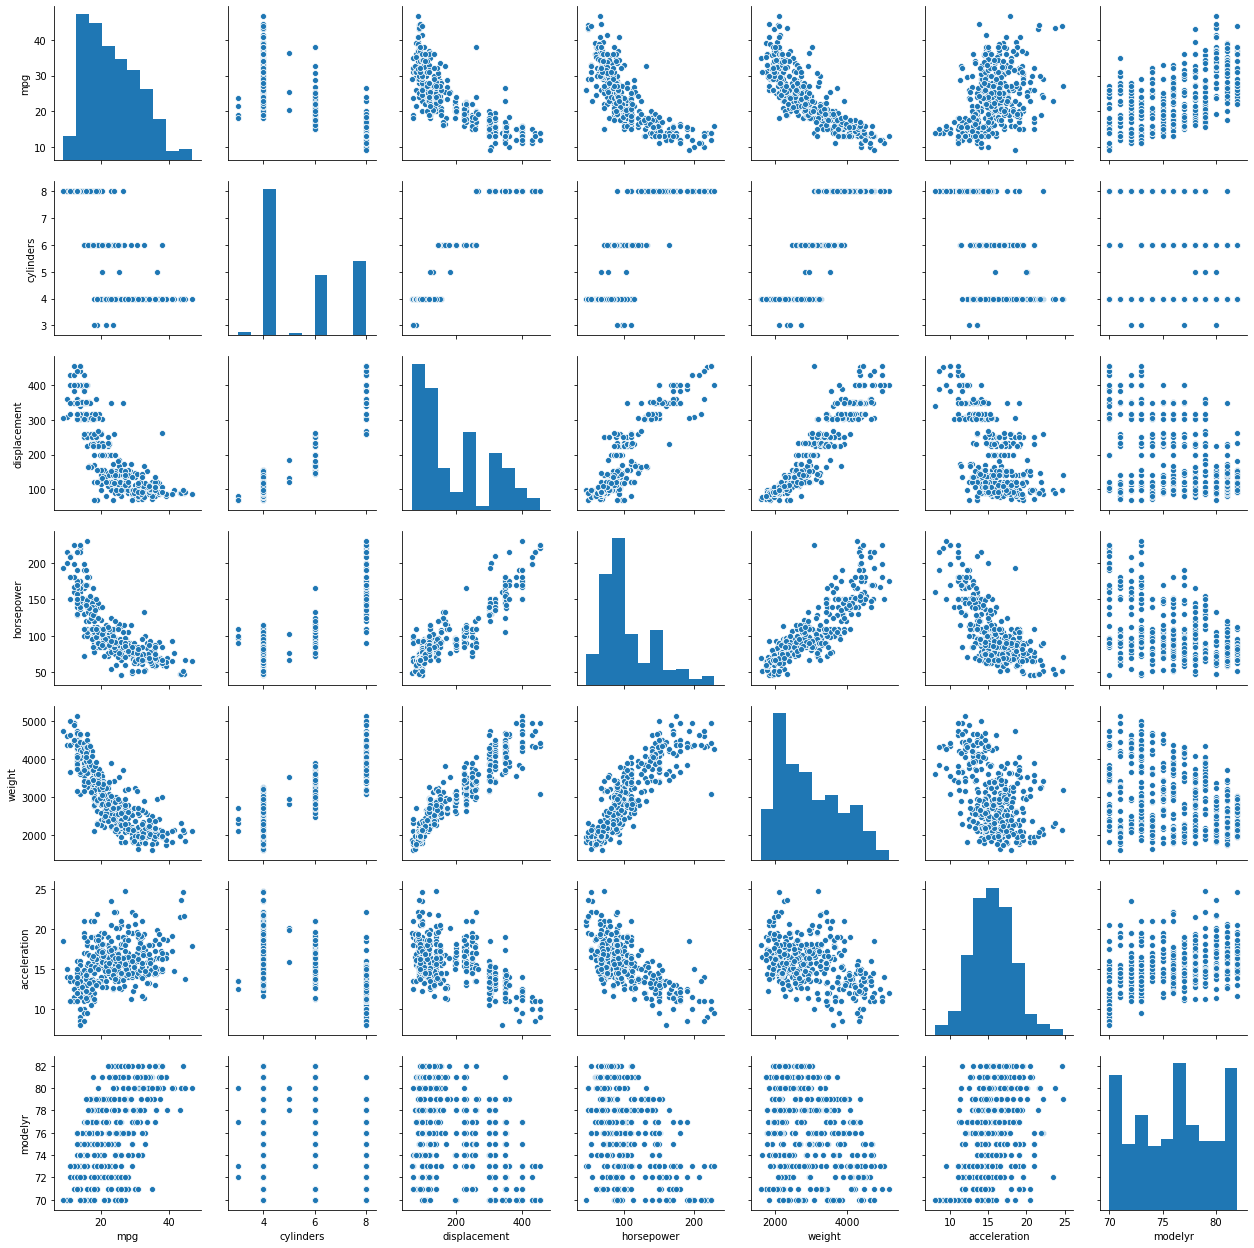

In [17]:
sns.pairplot(dfviz);

### Preparing data for models
'X' (upper case) for the Independent variables in DF
'y' (lower case) for the dependent variable in a series (1 predicted value column)

In [18]:
X = df2.drop(['mpg','origin_asia'],axis=1)
y = df2[['mpg']]

### Preparting Train & Test data-set
Applying Random pick for a 70:30 split between train & test data-set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

### Building & fitting the model

In [20]:
lr_mdl = LinearRegression()
lr_mdl.fit(X_train, y_train)

LinearRegression()

### Iterate through the model params for the fitment results

In [21]:
for idx, col_name in enumerate(X_train.columns):
    print('Coefficient for {} is {}'.format(col_name,lr_mdl.coef_[0][idx]))

Coefficient for cylinders is -0.3948079661648337
Coefficient for displacement is 0.02894551076548752
Coefficient for horsepower is -0.02175220772354718
Coefficient for weight is -0.007352032065147352
Coefficient for acceleration is 0.06191936600761958
Coefficient for modelyr is 0.8369338917645007
Coefficient for origin_america is -2.3952650365937753
Coefficient for origin_europe is 0.6060179643247401


In [22]:
intercept = lr_mdl.intercept_[0]
print('Intercept for the model is {}'.format(intercept))

Intercept for the model is -18.889469080696895


### Model Score for Training data-set and Test data-set
$ R^2 $ value

In [23]:
lr_mdl.score(X_train,y_train)

0.8141025501610559

In [24]:
lr_mdl.score(X_test,y_test)

0.8433135132808829

### Notes from SLR exercise 
Simple Linear Regression assumes the variables to be completely independent of each other.
However we know that is not true for the data-set under consideration.

### Introducing Polynomial Features (Adding Interaction terms) to make the model better 

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_lr_mdl = LinearRegression()
poly_lr_mdl.fit(X_train2,y_train)
y_pred = poly_lr_mdl.predict(X_test2)

print('Polynomial Model Training score : {}'.format(poly_lr_mdl.score(X_train2,y_train)))

Polynomial Model Training score : 0.9018808798839353


### Training scores will always increase as we add more  variables 
In this case 37 total variables by introducing 2nd degree polynomial with interactions

In [27]:
print('Polynomial Model Testing score : {}'.format(poly_lr_mdl.score(X_test2,y_test)))

Polynomial Model Testing score : 0.8657912627140414


### Testing score improvement means we found a better model
Besides the training score improvement, we also got a 2+% increase in Testing score and hence definitely a better model